# Titanic Data Analysis

**Goal**: predict if a passenger survived the sinking of the Titanic or not. 

In [972]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step 1**: read the raw data

In [973]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [974]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Step 2**: data proprecessing for missing data    
the missing data is Age and Cabin and Embarked 
I drop the variable Cabin because it has a large number of missing data    
For Age, it relates with the variable Pclass, so I replaced the missing values with the average Age of each Pclass. 

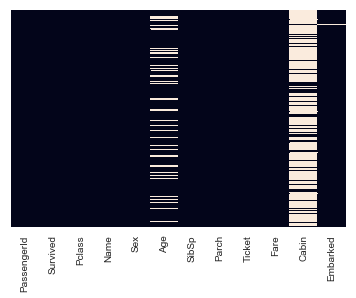

In [975]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [976]:
sns.set_style('whitegrid')

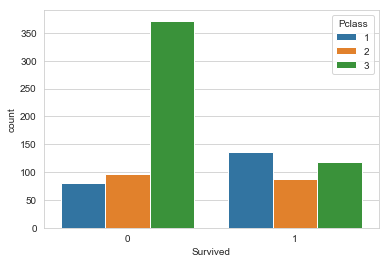

In [977]:
sns.countplot(x='Survived', hue='Pclass', data=train)

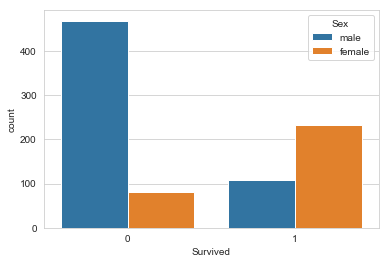

In [978]:
sns.countplot(x='Survived', hue='Sex', data=train)

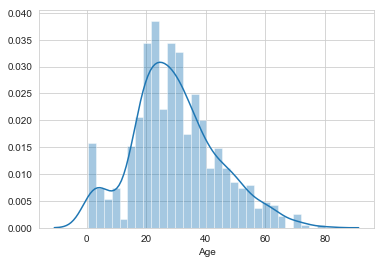

In [979]:
sns.distplot(train['Age'].dropna(), bins=30)

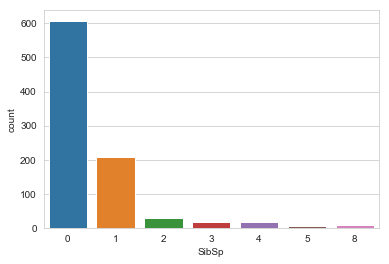

In [980]:
sns.countplot(x='SibSp', data=train)

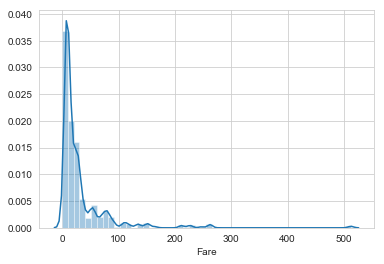

In [981]:
sns.distplot(train['Fare'])

From the count plot I plotted above, it shows that people in the first Class survived more and people in the third Class unsurvived most. Female survived more than the Male. The people on the Tatanic are mostly between the age 20-40. Most of the people had zero or one sibling. 

I planed to replace the missing age with the average age of each Pclass. Below is the relationship between Age and Pclass.

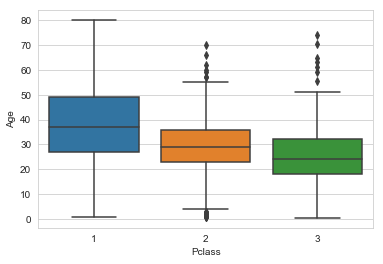

In [982]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [983]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [984]:
train['Age'] = train[['Age', 'Pclass']].apply(fillage, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(fillage, axis=1)

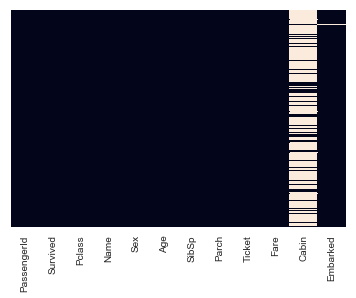

In [985]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [986]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [987]:
train.dropna(inplace=True)

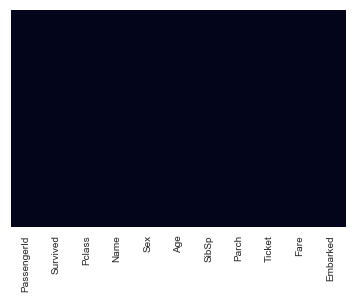

In [988]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [989]:
test.iloc[152,8] = np.mean(test['Fare'])

**Step 3**: Converting the categorical features

Now I obtained the train data without missing values. This step is for converting the categorical features such as Sex to dummy variables.

In [990]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embarked_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [991]:
train.drop(['Name', 'Ticket','Sex','Embarked'], inplace=True, axis=1)
test.drop(['Name', 'Ticket','Sex','Embarked'], inplace=True, axis=1)

In [992]:
train = pd.concat([train, sex, embarked], axis=1)
test = pd.concat([test, sex_test, embarked_test], axis=1)

In [993]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Step 4**: Logistic Model

I built the logistic regression to predict if a passenger survived the sinking of the Titanic or not based on the features I selected above.

In [994]:
from sklearn.linear_model import LogisticRegression

In [995]:
X_train = train.drop('Survived', axis=1)
X_test = test

In [996]:
y_train = train['Survived']

In [1007]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=500)

In [1008]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [1009]:
predictions = logmodel.predict(X_test)

In [1010]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [1011]:
predictions = pd.DataFrame(predictions, columns=['Survived'])
submission = pd.concat([test['PassengerId'], predictions], axis=1)

In [1012]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [1013]:
submission.to_csv('submission.csv', index=False)